In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

In [3]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [4]:
PATH = "data/bulldozer/"

In [5]:
!ls {PATH}

Data Dictionary.xlsx             TrainAndValid.zip
Machine_Appendix.csv             Valid.7z
Test.csv                         Valid.csv
Train.7z                         Valid.zip
Train.csv                        ValidSolution.csv
Train.zip                        median_benchmark.csv
TrainAndValid.7z                 random_forest_benchmark_test.csv
TrainAndValid.csv


In [6]:
df_raw = pd.read_csv('{PATH}Train.csv'.format(PATH=PATH), low_memory=False,
                    parse_dates=["saledate"])

In [7]:
df_raw.tail().T

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [132]:
# def display_all(df):
#     with pd.option_context("display.max_rows", 1000): 
#         with pd.option_context("display.max_columns", 1000):
#             display(df)

In [9]:
display_all(df_raw.tail().transpose())

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [11]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [13]:
regressor = RandomForestRegressor(n_jobs=4)

In [14]:
X = df_raw.drop('SalePrice', axis=1)
y = df_raw.SalePrice

In [15]:
regressor.fit(X, y)

/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Low'

In [16]:
X.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
fld = df_raw.saledate
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
5         2008
6         2004
7         2005
8         2009
9         2007
10        2008
11        2006
12        2005
13        2006
14        2006
15        2006
16        2007
17        2010
18        2006
19        2005
20        2006
21        2006
22        2007
23        2006
24        2004
25        2006
26        2006
27        2007
28        2007
29        2006
          ... 
401095    2011
401096    2011
401097    2011
401098    2011
401099    2011
401100    2011
401101    2011
401102    2011
401103    2011
401104    2011
401105    2011
401106    2011
401107    2011
401108    2011
401109    2011
401110    2011
401111    2011
401112    2011
401113    2011
401114    2011
401115    2011
401116    2011
401117    2011
401118    2011
401119    2011
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [18]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [19]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()

In [20]:
train_cats(df_raw)

In [21]:
def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [22]:
from pandas.api.types import is_period_dtype

In [24]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [25]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [26]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [27]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [29]:
display_all(df_raw.isnull().sum().sort_index() / len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [53]:
import os

In [175]:
!ls tmp/

bulldozer-raw


In [30]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozer-raw')

In [145]:
# df = pd.read_feather('tmp/bulldozer-raw', nthreads=1)

In [32]:
import feather

In [33]:
df_raw = feather.read_dataframe('tmp/bulldozer-raw')

In [34]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [35]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [186]:
regressor = RandomForestRegressor(n_jobs=4, n_estimators=10)

In [36]:
regressor.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
regressor.score(df, y)

0.9830968078021828

In [38]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [39]:
n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [40]:
rmse = lambda x, y: math.sqrt(((x-y)**2).mean())

In [41]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [49]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.15 s, sys: 43.2 ms, total: 3.2 s
Wall time: 821 ms
[0.11198762109777696, 0.35364860406750104, 0.9724169540285736, 0.7766469587691653]


In [50]:
# Speeding Things Up

In [53]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [58]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5251923063934535, 0.5815123124691827, 0.4028042227015911, 0.3960989244237834]


In [57]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, 
                          n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.329070518200751e-17, 0.48937375722773035, 1.0, 0.5723097724678936]


In [65]:
# Bagging
"""
Bag of little Bootstraps
Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other
So this idea of averaging models is a technique for Ensembling
""";

In [66]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10) 
m.fit(X_train, y_train) 
print_score(m)

[0.11104390555901603, 0.3762344745192974, 0.9733025689520814, 0.7472069386832276]


In [72]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:, 0], np.mean(preds[:, 0]), y_valid[0]

(array([9.21034, 9.54681, 9.21034, 9.51044, 9.21034, 9.54681, 9.30565, 9.13238, 8.9872 , 9.61581, 9.6486 ,
        9.25913, 9.5819 , 9.39266, 9.5819 , 9.25913, 9.21034, 9.10498, 9.21034, 9.4727 ]),
 9.349890718904179,
 9.104979856318357)

In [69]:
preds.shape

(10, 12000)

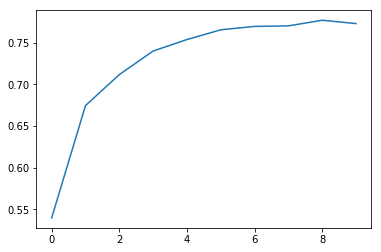

In [73]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [71]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=20) 
m.fit(X_train, y_train) 
print_score(m)

[0.10034121068485312, 0.3529489250037117, 0.9782008936116131, 0.777529873915722]


In [1]:
??draw_graph

Object `draw_graph` not found.


In [74]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40) 
m.fit(X_train, y_train) 
print_score(m)

[0.0951985721685141, 0.34463383726826846, 0.9803781077411807, 0.7878887002055032]


In [75]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=80) 
m.fit(X_train, y_train) 
print_score(m)

[0.09325212934604797, 0.3418028645647872, 0.9811722886199522, 0.7913591371008737]


In [76]:
# Out of Bag score
# Sometimes your dataset will be small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

In [77]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09499781554333633, 0.3396861092663671, 0.9804607785464738, 0.7939353245677226, 0.8602828783284747]


In [79]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [81]:
set_rf_samples(20000)

In [84]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.23934620257972197, 0.2787658673724045, 0.8802741555281451, 0.8612199090883659, 0.8678751708189218]


In [85]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22770080190373312, 0.2632486495721078, 0.8916412600312973, 0.8762400064729184, 0.880085040233971]


In [86]:
# reset_rf_samples()

In [87]:
reset_rf_samples()
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07828344709232674, 0.23851003100295715, 0.9871921949674154, 0.8984075879371095, 0.9085157907701324]


In [88]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train) 
print_score(m)

[0.11501426652149115, 0.23405278580963443, 0.9723536211911324, 0.9021692003582625, 0.9084478247887121]


In [90]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                      max_features=0.5, n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train) 
print_score(m)

[0.11912967452245596, 0.22830969908109272, 0.9703397548300422, 0.9069113574639469, 0.9117531560578511]


In [91]:
df_raw.fiProductClassDesc.cat.categories

Index(['Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth',
       'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
       'Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth',
       'Backhoe Loader - 16.0 + Ft Standard Digging Depth',
       'Backhoe Loader - Unidentified',
       'Hydraulic Excavator, Track - 0.0 to 2.0 Metric Tons',
       'Hydraulic Excavator, Track - 11.0 to 12.0 Metric Tons',
       'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
       'Hydraulic Excavator, Track - 14.0 to 16.0 Metric Tons',
       'Hydraulic Excavator, Track - 150.0 to 300.0 Metric Tons',
       'Hydraulic Excavator, Track - 16.0 to 19.0 Metric Tons',
       'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
       'Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons',
       'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
       'Hydraulic Excavator, Track - 24.0 to 28.0 Metric Tons',
       'Hydraulic Excavator, Track - 28.0 to 33.0 Metric Tons',
 